# Title     : CMPE-258 Assignment #1 Part #1
# Created by: Rohan Kumar
# Created on: 02/08/2020

Install Fastbook

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()


     |████████████████████████████████| 727kB 17.1MB/s 
     |████████████████████████████████| 194kB 55.1MB/s 
     |████████████████████████████████| 51kB 8.6MB/s 
     |████████████████████████████████| 1.2MB 61.8MB/s 
     |████████████████████████████████| 61kB 10.5MB/s 
Mounted at /content/gdrive


Import modules

In [ ]:
from fastbook import *
from fastai.collab import *
from fastai.text.all import *
from fastai.vision.all import *
from fastai.tabular.all import *


Run 'cnn_learner'

In [ ]:
path = untar_data(URLs.PETS)/"images"

def is_dog(x):
  return x[0].islower()

cnn_dls = ImageDataLoaders.from_name_func(
    path=path,
    fnames=get_image_files(path),
    label_func=is_dog,
    valid_pct=0.20,
    seed=42,
    item_tfms=Resize(224)
)

cnn_learn = cnn_learner(cnn_dls, resnet34, metrics=error_rate)
cnn_learn.fine_tune(1)


epoch,train_loss,valid_loss,error_rate,time
0,0.129225,0.028125,0.006089,00:50


epoch,train_loss,valid_loss,error_rate,time
0,0.064243,0.020849,0.008119,00:55


Test 'cnn_learner'

In [ ]:
def cnn_learner_test(animal):
  img = PILImage.create(animal)
  img.to_thumb(192)
  res = cnn_learn.predict(img)
  print("Is this a dog? %s (%.6f%%)" % (res[0], res[2][1].item()))

cnn_learner_test(image_cat())
cnn_learner_test(image_bear())


Is this a dog? False (0.000000%)


Is this a dog? True (0.998434%)


Run 'unet_learner'


In [ ]:
path = untar_data(URLs.CAMVID_TINY)

def get_label(x):
  return path/"labels"/f"{x.stem}_P{x.suffix}"

unet_dls = SegmentationDataLoaders.from_label_func(
    path=path,
    fnames=get_image_files(path/"images"),
    label_func=get_label,
    valid_pct=0.20,
    codes=np.loadtxt(path/"codes.txt", dtype=str),
    bs=8
)

unet_learn = unet_learner(unet_dls, resnet34)
unet_learn.fine_tune(8)


epoch,train_loss,valid_loss,time
0,2.809941,6.270029,00:01


epoch,train_loss,valid_loss,time
0,2.477569,1.988763,00:01
1,1.984296,1.229388,00:01
2,1.720417,1.518584,00:01
3,1.573015,1.173401,00:01
4,1.430090,0.939859,00:02
5,1.293275,0.838986,00:02
6,1.173858,0.791769,00:02
7,1.080761,0.782806,00:02


Test 'unet_learner'

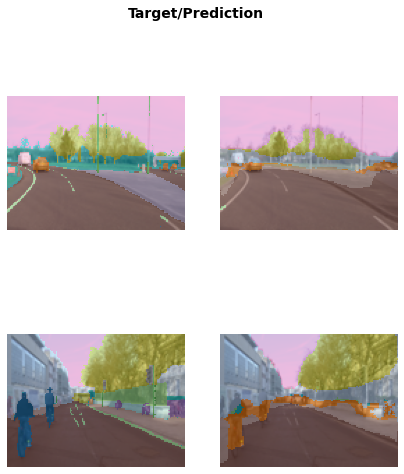

In [ ]:
unet_learn.show_results(max_n=6, figsize=(7, 8))


Run 'text_classifier_learner'

In [ ]:
path = untar_data(URLs.IMDB)

text_classifier_dls = TextDataLoaders.from_folder(
    path=path, 
    valid="test"
)

text_classifier_learn = text_classifier_learner(text_classifier_dls, AWD_LSTM, 
                                                drop_mult=0.5, metrics=accuracy)
text_classifier_learn.fine_tune(4, 1e-2)


epoch,train_loss,valid_loss,accuracy,time
0,0.450901,0.407875,0.820880,03:53


epoch,train_loss,valid_loss,accuracy,time
0,0.294472,0.315864,0.886080,07:30
1,0.250254,0.370099,0.838160,07:28
2,0.193637,0.182739,0.928440,07:28
3,0.146743,0.188714,0.929200,07:27


Test 'text_classifier_learner'

In [ ]:
def text_classifier_learner_test(text):
  print(text_classifier_learn.predict(text))

text_classifier_learner_test("This was a bad movie")
text_classifier_learner_test("This was a okay movie")
text_classifier_learner_test("This was a good movie")
text_classifier_learner_test("This was a great movie")


('neg', tensor(0), tensor([0.9833, 0.0167]))


('neg', tensor(0), tensor([0.8745, 0.1255]))


('pos', tensor(1), tensor([0.0224, 0.9776]))


('pos', tensor(1), tensor([0.0043, 0.9957]))


Run 'tabular_learner'

In [ ]:
path = untar_data(URLs.ADULT_SAMPLE)

tabular_dls = TabularDataLoaders.from_csv(
    path/"adult.csv",
    path=path,
    procs = [Categorify, FillMissing, Normalize],
    cat_names = ["workclass", "education", "marital-status", "occupation", "relationship", "race"],
    cont_names = ["age", "fnlwgt", "education-num"],
    y_names="salary"
)

tabular_learn = tabular_learner(tabular_dls, metrics=accuracy)
tabular_learn.fit_one_cycle(3)


epoch,train_loss,valid_loss,accuracy,time
0,0.365156,0.359722,0.832310,00:04
1,0.347171,0.349972,0.835995,00:04
2,0.343723,0.346641,0.840602,00:05


Run 'collab_learner'

In [ ]:
path = untar_data(URLs.ML_SAMPLE)/"ratings.csv"

collab_dls = CollabDataLoaders.from_csv(
    csv=path
)

collab_learn = collab_learner(collab_dls, y_range=(0.5, 5.5))
collab_learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.473378,1.477195,00:00


epoch,train_loss,valid_loss,time
0,1.359570,1.412472,00:00
1,1.243806,1.215732,00:00
2,0.997328,0.904825,00:00
3,0.778798,0.769047,00:00
4,0.678606,0.736030,00:00
5,0.649887,0.723675,00:00
6,0.637531,0.719908,00:00
7,0.617780,0.718012,00:00
8,0.617876,0.716946,00:00
9,0.609417,0.716867,00:00


Test 'collab_learner'

In [ ]:
collab_learn.show_results()

,userId,movieId,rating,rating_pred
0,66.0,27.0,4.0,3.755931
1,53.0,49.0,5.0,4.309757
2,42.0,14.0,4.0,3.671241
3,15.0,84.0,3.0,3.986040
4,92.0,24.0,3.5,3.590061
5,92.0,64.0,4.0,3.985088
6,37.0,35.0,3.0,4.133461
7,83.0,51.0,4.5,4.114502
8,63.0,18.0,5.0,2.968065
